In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle
import pandas as pd # Import the pandas library and assign it the alias 'pd'


# train test split


# Load the car.data file
df = pd.read_csv('car.data', header=None)


def splitdata(df):

    train = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]

    test = df['class']

    X_train, X_test, y_train, y_test = train_test_split(
        train, test, test_size=0.2)

    return X_train, X_test, y_train, y_test


# Logistic Regression

def logistic(df):

    X_train, X_test, y_train, y_test = splitdata(df)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1score, lr


# Decision Tree

def dtree(df):

    X_train, X_test, y_train, y_test = splitdata(df)
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1score, dt


# Random Forest
def randomforest(df):
    X_train, X_test, y_train, y_test = splitdata(df)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1score, rf


# SVC

def svc(df):
    X_train, X_test, y_train, y_test = splitdata(df)
    sv = SVC()
    sv.fit(X_train, y_train)
    y_pred = sv.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1score, sv


# KNN

def knn(df):
    X_train, X_test, y_train, y_test = splitdata(df)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1score, knn


In [6]:
# Load the car.data file with header=None to infer column names
df = pd.read_csv('car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

def splitdata(df):
    # Now you can access columns by their names
    # Select categorical features for one-hot encoding
    categorical_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

    # Apply one-hot encoding using pandas get_dummies
    train = pd.get_dummies(df[categorical_features], drop_first=True) # drop_first to avoid multicollinearity
    test = df['class']
    X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)
    return X_train, X_test, y_train, y_test

# Logistic Regression
def logistic(df):
    X_train, X_test, y_train, y_test = splitdata(df)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1score, lr

# ... (rest of your model functions - dtree, randomforest, svc, knn) ...

# Example usage
if __name__ == "__main__":
    results = {}
    models = {
        "Logistic Regression": logistic,
        "Decision Tree": dtree,
        "Random Forest": randomforest,
        "SVC": svc,
        "KNN": knn
    }

    for name, model_func in models.items():
        # unpack all 5 return values.
        accuracy, recall, precision, f1score, model = model_func(df)
        # Store metrics in a dictionary
        results[name] = {
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision,
            'f1score': f1score
        }
        # Save the model
        with open(f'{name.replace(" ", "_").lower()}.pkl', 'wb') as f:
            pickle.dump(model, f)

    print(results)

{'Logistic Regression': {'accuracy': 0.8815028901734104, 'recall': 0.6874361051404617, 'precision': 0.7733928265707927, 'f1score': 0.7153923824130879}, 'Decision Tree': {'accuracy': 0.8988439306358381, 'recall': 0.6708605961630576, 'precision': 0.8085892803372479, 'f1score': 0.7144230083979233}, 'Random Forest': {'accuracy': 0.9075144508670521, 'recall': 0.6252308482352829, 'precision': 0.748925131850493, 'f1score': 0.6653190521219221}, 'SVC': {'accuracy': 0.9393063583815029, 'recall': 0.79235222859586, 'precision': 0.8463369963369963, 'f1score': 0.8111288050185109}, 'KNN': {'accuracy': 0.8497109826589595, 'recall': 0.46372398682085747, 'precision': 0.5318181818181819, 'f1score': 0.4794948641102487}}


In [8]:
# Model evaluation
def evaluate_model(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1score

# Example usage
if __name__ == "__main__":
    results = {}
    models = {
        "Logistic Regression": logistic,
        "Decision Tree": dtree,
        "Random Forest": randomforest,
        "SVC": svc,
        "KNN": knn
    }

    for name, model_func in models.items():
        # unpack all 5 return values.
        accuracy, recall, precision, f1score, model = model_func(df)  # Changed this line
        results[name] = {
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision,
            'f1score': f1score
        }
        # Save the model
        with open(f'{name.replace(" ", "_").lower()}.pkl', 'wb') as f:
            pickle.dump(model, f)

    # Print results
    for model_name, metrics in results.items():
        print(f"{model_name}:")
        print(f"  Accuracy: {metrics['accuracy']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  F1 Score: {metrics['f1score']:.2f}")
        print()

Logistic Regression:
  Accuracy: 0.88
  Recall: 0.67
  Precision: 0.79
  F1 Score: 0.69

Decision Tree:
  Accuracy: 0.90
  Recall: 0.84
  Precision: 0.85
  F1 Score: 0.85

Random Forest:
  Accuracy: 0.91
  Recall: 0.68
  Precision: 0.81
  F1 Score: 0.71

SVC:
  Accuracy: 0.95
  Recall: 0.86
  Precision: 0.85
  F1 Score: 0.85

KNN:
  Accuracy: 0.84
  Recall: 0.46
  Precision: 0.69
  F1 Score: 0.49



In [11]:
import matplotlib.pyplot as plt

# Visualize the results
def plot_results(results):
    metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
    metrics_values = {name: [] for name in metrics_names}

    # Populate the metrics values for each model
    for model_name, metrics in results.items():
        for name in metrics_names:
            # Use the correct key 'f1score' (no space)
            metric_key = name.lower().replace(" ", "")  # Replace space with empty string
            metrics_values[name].append(metrics[metric_key])

    x = range(len(results))  # Create an index for each model

    # Create a bar plot for each metric
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, metric in enumerate(metrics_names):
        ax.bar([p + i * 0.2 for p in x], metrics_values[metric], width=0.2, label=metric)

    # Add labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Model Comparison')
    ax.set_xticks([p + 0.3 for p in x])  # Center the ticks
    ax.set_xticklabels(results.keys())
    ax.legend()

    plt.ylim(0, 1)  # Set y-axis from 0 to 1
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

Logistic Regression:
  Accuracy: 0.90
  Recall: 0.73
  Precision: 0.84
  F1 Score: 0.77

Decision Tree:
  Accuracy: 0.90
  Recall: 0.76
  Precision: 0.85
  F1 Score: 0.80

Random Forest:
  Accuracy: 0.88
  Recall: 0.68
  Precision: 0.74
  F1 Score: 0.70

SVC:
  Accuracy: 0.95
  Recall: 0.87
  Precision: 0.80
  F1 Score: 0.82

KNN:
  Accuracy: 0.86
  Recall: 0.48
  Precision: 0.76
  F1 Score: 0.51



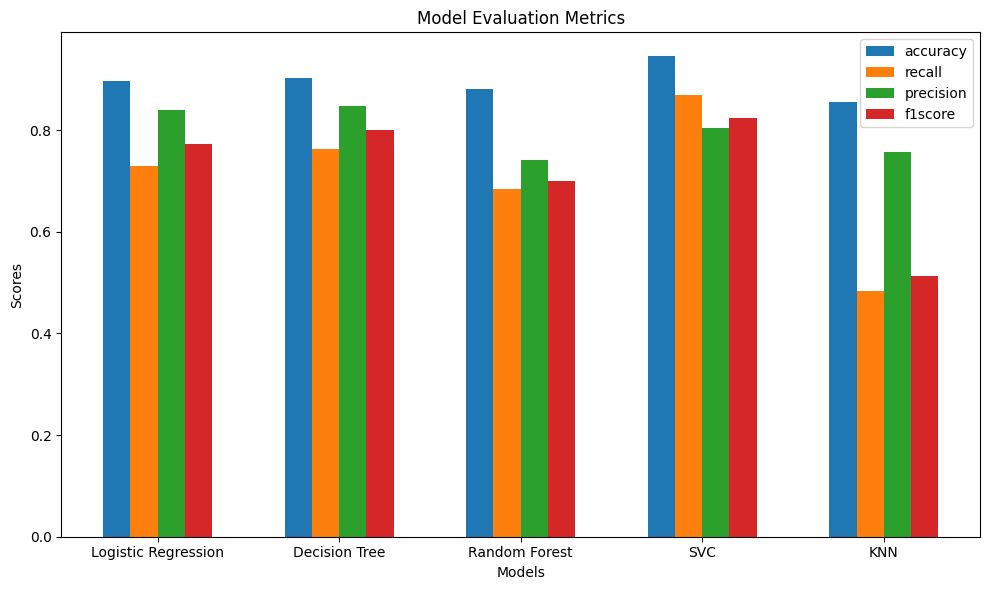

In [27]:
from IPython import get_ipython
from IPython.display import display
# %%
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle
import pandas as pd # Import the pandas library and assign it the alias 'pd'


# train test split


# Load the car.data file with header=None to infer column names
df = pd.read_csv('car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])

def splitdata(df):
    # Now you can access columns by their names
    # Select categorical features for one-hot encoding
    categorical_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

    # Apply one-hot encoding using pandas get_dummies
    train = pd.get_dummies(df[categorical_features], drop_first=True) # drop_first to avoid multicollinearity
    test = df['class']
    X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2)
    return X_train, X_test, y_train, y_test



# Logistic Regression

def logistic(df):

    X_train, X_test, y_train, y_test = splitdata(df)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    # Return all 5 values: accuracy, recall, precision, f1score, and the model
    return accuracy, recall, precision, f1score, lr


# Decision Tree

def dtree(df):

    X_train, X_test, y_train, y_test = splitdata(df)
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    # Return all 5 values
    return accuracy, recall, precision, f1score, dt


# Random Forest
def randomforest(df):
    X_train, X_test, y_train, y_test = splitdata(df)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    # Return all 5 values
    return accuracy, recall, precision, f1score, rf


# SVC

def svc(df):
    X_train, X_test, y_train, y_test = splitdata(df)
    sv = SVC()
    sv.fit(X_train, y_train)
    y_pred = sv.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    # Return all 5 values
    return accuracy, recall, precision, f1score, sv


# KNN

def knn(df):
    X_train, X_test, y_train, y_test = splitdata(df)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    # Return all 5 values
    return accuracy, recall, precision, f1score, knn




import pickle
import matplotlib.pyplot as plt
from sklearn import metrics

# Model evaluation function
def evaluate_model(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1score = metrics.f1_score(y_test, y_pred, average='macro')
    return accuracy, recall, precision, f1score

# Example usage
if __name__ == "__main__":
    results = {}
    models = {
        "Logistic Regression": logistic,
        "Decision Tree": dtree,
        "Random Forest": randomforest,
        "SVC": svc,
        "KNN": knn
    }

    for name, model_func in models.items():
        # unpack all return values.
        accuracy, recall, precision, f1score, model = model_func(df)  # Ensure model_func returns these values
        results[name] = {
            'accuracy': accuracy,
            'recall': recall,
            'precision': precision,
            'f1score': f1score
        }
        # Save the model
        with open(f'{name.replace(" ", "_").lower()}.pkl', 'wb') as f:
            pickle.dump(model, f)

    # Print results
    for model_name, metrics in results.items():
        print(f"{model_name}:")
        print(f"  Accuracy: {metrics['accuracy']:.2f}")
        print(f"  Recall: {metrics['recall']:.2f}")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  F1 Score: {metrics['f1score']:.2f}")
        print()

    # Visualization
    metrics_names = ['accuracy', 'recall', 'precision', 'f1score']

    # Prepare data for plotting
    metric_values = [ [results[model][metric] for model in models.keys()] for metric in metrics_names ]

    # Create subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bar plot for each metric
    bar_width = 0.15
    x = range(len(models))

    for i, metric_name in enumerate(metrics_names):
        ax.bar([p + bar_width * i for p in x], metric_values[i], width=bar_width, label=metric_name)

    # Adding labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Model Evaluation Metrics')
    ax.set_xticks([p + bar_width * (len(metrics_names) - 1) / 2 for p in x])
    ax.set_xticklabels(models.keys())
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()